In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#import data
hotel = pd.read_csv('/content/drive/MyDrive/Finpro_Ervina/hotel_bookings.csv')
df = hotel.copy()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#check duplicate columns
df.duplicated().sum()

31994

In [7]:
total_duplicate = df.duplicated().sum()

print(f"Percentase Duplikat secara keseluruhan ada {total_duplicate*100/df.shape[0]}")

Percentase Duplikat secara keseluruhan ada 26.797889270458164


In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.shape

(87396, 32)

In [10]:
# to check missing value
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [11]:
total_missing = df.isna().sum().sum()

print(f"Percentase Missing secara keseluruhan ada {total_missing*100/df.shape[0]}")

Percentase Missing secara keseluruhan ada 108.45576456588402


#### because of the missing value is so much, I decided to replace the missing value

In [12]:
#Children(4)replace into 0
df['children'].fillna(0, inplace=True)

In [13]:
#country(488) replace into Unknown
df['country'].fillna('Unknown',inplace=True)

In [14]:
#agent(16340) replace into 0
df['agent'].fillna(0,inplace=True)

In [15]:
#company(112593) replace into 0
df['company'].fillna(0,inplace=True)

In [16]:
#check again if there's any missing values left
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [17]:
#replace undifined on meal into sc for no meal package
df['meal'].replace('undefined','SC',inplace=True)

In [18]:
#change the month from categorical into numeric
# Define a mapping dictionary for month names to numerical values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Replace month names with numerical values
df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)

In [19]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,10,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,10,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,11,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,12,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,12,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,6,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,6,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,7,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,7,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [20]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  int64  
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                           

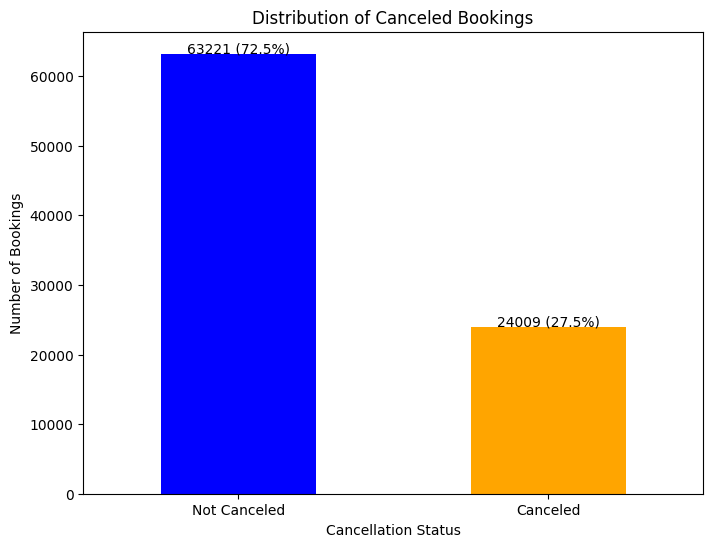

In [22]:
#to find number of cancellation
# Count the number of canceled and non-canceled bookings
cancel_counts = df['is_canceled'].value_counts()

# Calculate the percentages
cancel_percentage = cancel_counts / cancel_counts.sum() * 100

# Plotting the data
plt.figure(figsize=(8, 6))
bars = cancel_counts.plot(kind='bar', color=['blue', 'orange'])

# Display percentages on the bars
for i, val in enumerate(cancel_counts):
    plt.text(i, val + 100, f'{val} ({cancel_percentage[i]:.1f}%)', ha='center')

plt.title('Distribution of Canceled Bookings')
plt.xlabel('Cancellation Status')
plt.ylabel('Number of Bookings')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'], rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

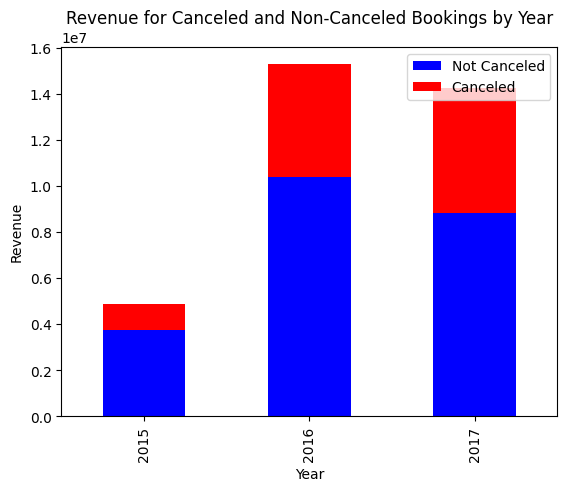

In [23]:
# Calculate revenue
df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])

# Group data by year and calculate total revenue for canceled and non-canceled bookings
revenue_cancel_status_by_year = df.groupby(['arrival_date_year', 'is_canceled'])['revenue'].sum().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
revenue_cancel_status_by_year.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Revenue for Canceled and Non-Canceled Bookings by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend(['Not Canceled', 'Canceled'], loc='upper right')
plt.show()

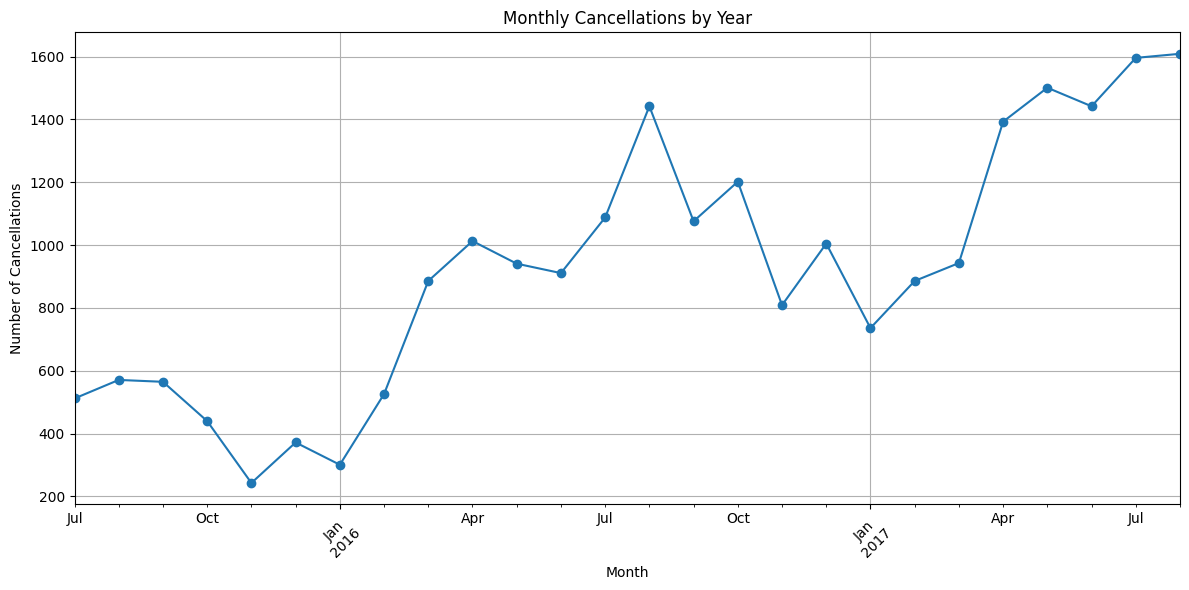

In [24]:
# First, convert arrival_date_month and arrival_date_year to a datetime column
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str), format='%Y-%m')

# Then, filter out canceled bookings
canceled_bookings = df[df['is_canceled'] == 1]

# Group by arrival date and count cancellations
monthly_cancellations = canceled_bookings.groupby(['arrival_date']).size()

# Plot the data
plt.figure(figsize=(12, 6))
monthly_cancellations.plot(marker='o', linestyle='-')
plt.title('Monthly Cancellations by Year')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## EDA

#### Where do the guests come from and how many are they?

In [25]:
#after cleaning, separte Resort and City Hotel
# to know actual visitor numbers, only bookings that were not canceled are included

rh = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
ch = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [26]:
# Get number of actual guests by country
country_data = pd.DataFrame(df[df['is_canceled'] == 0]['country'].value_counts())
country_data.head()

,country
PRT,17573
GBR,8440
FRA,7091
ESP,5382
DEU,4332


In [27]:
# Rename the 'count' column to 'number_of_guests'
country_data.rename(columns={'country': 'number_of_guests'}, inplace=True)
country_data.head()

,number_of_guests
PRT,17573
GBR,8440
FRA,7091
ESP,5382
DEU,4332


In [28]:
# Count the total number of guests
total_guests = country_data['number_of_guests'].sum()
print("Total number of guests:", total_guests)

Total number of guests: 63221


In [29]:
# Add a new column for the guest percentage
country_data['guest_persentage'] = round(country_data['number_of_guests']/total_guests *100, 2)

In [30]:
# Making new column for country in country data
country_data['country'] = country_data.index

In [36]:
import plotly.express as px

# Select the top 15 countries
top_15_countries = country_data.sort_values(by='number_of_guests', ascending=False).head(15)

# Create a horizontal bar chart
fig = px.bar(top_15_countries,
            y='country',
            x='number_of_guests',
            title='Top 15 Home Countries of Guests',
            template='seaborn')

# Update the properties of the bar chart traces
fig.update_traces(texttemplate='%{x}', textposition='outside')

fig.show()


In [37]:
# Create the choropleth map with the custom color scale
fig = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data['guest_persentage'],
                    hover_name=country_data.index,
                    color_continuous_scale='Plasma',
                    title='Home country of guests')

# Show the map
fig.show()


#### People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.

## How much do guests pay for a room per night?

In [38]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_white')

The figure shows that the average price per room depends on its type

## How does the price vary per night over the year?

In [39]:
resort_hotel = rh.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,1,48.599615
1,2,53.624311
2,3,57.110018
3,4,76.841664
4,5,77.725129
5,6,109.026942
6,7,150.914540
7,8,182.103524
8,9,98.855456
9,10,62.634853


In [40]:
city_hotel=ch.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,1,83.378062
1,2,88.210810
2,3,91.306933
3,4,114.251636
4,5,124.825944
5,6,120.673753
6,7,120.069489
7,8,122.825388
8,9,116.973279
9,10,105.517410


In [41]:
final_prices = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_prices.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_prices

,month,price_for_resort,price_for_city_hotel
0,1,48.599615,83.378062
1,2,53.624311,88.210810
2,3,57.110018,91.306933
3,4,76.841664,114.251636
4,5,77.725129,124.825944
5,6,109.026942,120.673753
6,7,150.914540,120.069489
7,8,182.103524,122.825388
8,9,98.855456,116.973279
9,10,62.634853,105.517410


In [42]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_white')

<Figure size 1700x800 with 0 Axes>

the prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn .

## Which are the most busy months?

In [43]:
resort_guests = rh['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,8,3153
1,7,3013
2,5,2246
3,10,2209
4,3,2191
5,4,2169
6,2,2053
7,6,1926
8,9,1875
9,11,1744


In [44]:
city_guests = ch['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,8,4467
1,7,3834
2,5,3656
3,6,3477
4,3,3469
5,4,3325
6,9,3166
7,10,3070
8,2,2618
9,11,2177


In [45]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,8,3153,4467
1,7,3013,3834
2,5,2246,3656
3,10,2209,3070
4,3,2191,3469
5,4,2169,3325
6,2,2053,2618
7,6,1926,3477
8,9,1875,3166
9,11,1744,2177


In [46]:
final_guests = final_guests.sort_values('month')
final_guests

,month,no of guests in resort,no of guest in city hotel
11,1,1687,1961
6,2,2053,2618
4,3,2191,3469
5,4,2169,3325
2,5,2246,3656
7,6,1926,3477
1,7,3013,3834
0,8,3153,4467
8,9,1875,3166
3,10,2209,3070


In [47]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_white')

spring (mar-june),summer(jun-sept), autumn(sept-oct), winter (des-mar)

* The City hotel has more guests during spring to autumn, , In July and August there are less visitors.
* Guest numbers for the Resort hotel go down slightly from June to September. Both hotels have the fewest guests during the winter.



## How long do people stay at the hotel?

In [48]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,revenue,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,196.0,2015-07-01


In [49]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

<ipython-input-49-a6d36badedd5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,revenue,arrival_date,total_nights
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2015-07-01,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2015-07-01,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0,2015-07-01,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0,2015-07-01,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,196.0,2015-07-01,2


In [50]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [51]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_white')

In city hotel most people stay for 3 nights</br>
In resort hotel people stay the most for 1 nights and some for 7 nights

## how many bookings are canceled

In [52]:
#how many bookings were canceled
# absolute cancelations:
total_cancelations = df["is_canceled"].sum()
rh_cancelations = df[df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = df[df["hotel"] == "City Hotel"]["is_canceled"].sum()

# as percent:
rel_cancel = total_cancelations / df.shape[0] * 100
rh_rel_cancel = rh_cancelations / df.loc[df["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancelations / df.loc[df["hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 24,009 (28 %)
Resort hotel bookings canceled: 7,974 (23 %)
City hotel bookings canceled: 16,035 (30 %)


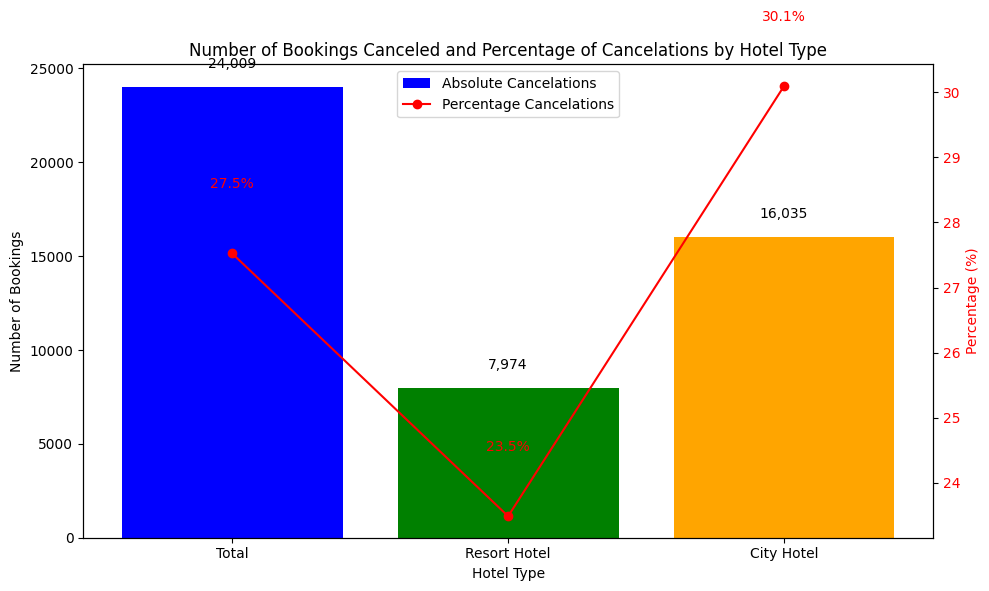

In [53]:
import matplotlib.pyplot as plt

# Data
hotels = ['Total', 'Resort Hotel', 'City Hotel']
cancelations = [total_cancelations, rh_cancelations, ch_cancelations]
percent_cancelations = [rel_cancel, rh_rel_cancel, ch_rel_cancel]

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Absolute cancelations
ax1.bar(hotels, cancelations, color=['blue', 'green', 'orange'], label='Absolute Cancelations')
ax1.set_ylabel('Number of Bookings', color='black')
ax1.set_xlabel('Hotel Type')
ax1.tick_params(axis='y', labelcolor='black')

# Adding labels on bars for absolute cancelations
for i, cancelation in enumerate(cancelations):
    ax1.text(i, cancelation + 1000, f'{cancelation:,}', ha='center', color='black')

# Percentage cancelations
ax2 = ax1.twinx()
ax2.plot(hotels, percent_cancelations, color='red', marker='o', label='Percentage Cancelations')
ax2.set_ylabel('Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding labels on lines for percentage cancelations
for i, percent in enumerate(percent_cancelations):
    ax2.text(i, percent + 1, f'{percent:.1f}%', ha='center', color='red')

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

plt.title('Number of Bookings Canceled and Percentage of Cancelations by Hotel Type')

# Show plot
plt.tight_layout()
plt.show()


## Data Preprocessing

In [54]:
data = df.copy()
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,revenue,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,196.0,2015-07-01


<ipython-input-55-8ec160aa8e20>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



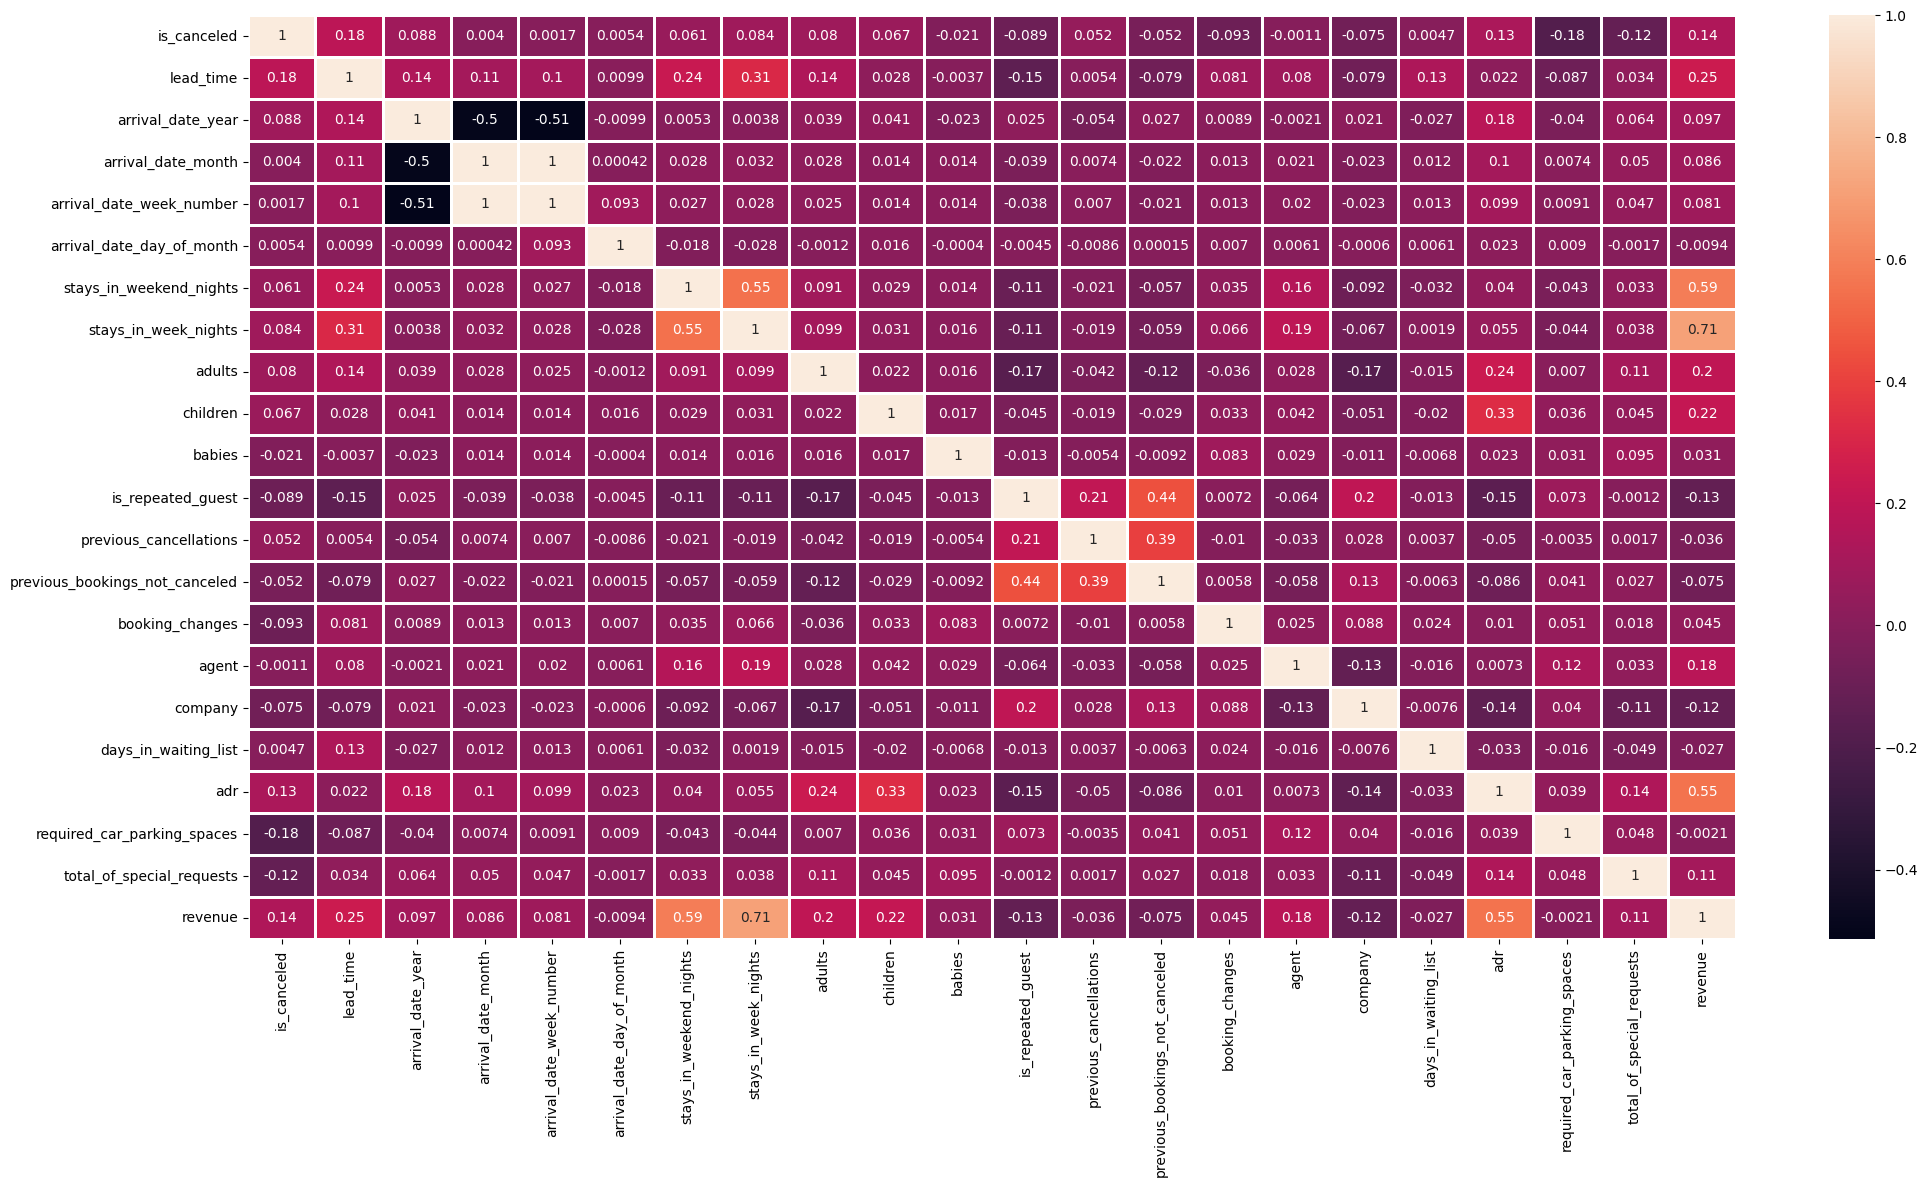

In [55]:
plt.figure(figsize = (24, 12))

corr = data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

From the data above there's no high correlation (>0.83) between feature,There are no multicollinearity

In [56]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

<ipython-input-56-67930696548f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



is_canceled                       1.000000
lead_time                         0.184515
required_car_parking_spaces       0.184456
revenue                           0.139066
adr                               0.127233
total_of_special_requests         0.120794
booking_changes                   0.093236
is_repeated_guest                 0.088764
arrival_date_year                 0.088020
stays_in_week_nights              0.084159
adults                            0.080271
company                           0.075314
children                          0.067182
stays_in_weekend_nights           0.060992
previous_bookings_not_canceled    0.052178
previous_cancellations            0.051501
babies                            0.020627
arrival_date_day_of_month         0.005449
days_in_waiting_list              0.004710
arrival_date_month                0.003954
arrival_date_week_number          0.001691
agent                             0.001145
Name: is_canceled, dtype: float64

In [57]:
# dropping columns that are not useful

unuse_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list','revenue','arrival_date']

data.drop(unuse_col, axis = 1, inplace = True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_month              87230 non-null  int64  
 4   arrival_date_week_number        87230 non-null  int64  
 5   arrival_date_day_of_month       87230 non-null  int64  
 6   stays_in_weekend_nights         87230 non-null  int64  
 7   stays_in_week_nights            87230 non-null  int64  
 8   adults                          87230 non-null  int64  
 9   children                        87230 non-null  float64
 10  babies                          87230 non-null  int64  
 11  meal                            87230 non-null  object 
 12  market_segment                 

In [59]:
# creating categorical dataframes

cat_cols = [col for col in data.columns if data[col].dtype == 'O']
cat_cols

['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [60]:
cat_data = data[cat_cols]
cat_data.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [61]:
cat_data['reservation_status_date'] = pd.to_datetime(cat_data['reservation_status_date'])

cat_data['year'] = cat_data['reservation_status_date'].dt.year
cat_data['month'] = cat_data['reservation_status_date'].dt.month
cat_data['day'] = cat_data['reservation_status_date'].dt.day

<ipython-input-61-25e04726f1d0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-25e04726f1d0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-25e04726f1d0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-25e0472

In [62]:
cat_data.drop(['reservation_status_date'], axis=1, inplace=True)

<ipython-input-62-122b02cf58ba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
cat_data.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [64]:
# printing unique values of each column
for col in cat_data.columns:
    print(f"{col}: \n{cat_data[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [65]:
# encoding categorical variables

cat_data['hotel'] = cat_data['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_data['meal'] = cat_data['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_data['market_segment'] = cat_data['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_data['distribution_channel'] = cat_data['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_data['reserved_room_type'] = cat_data['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_data['deposit_type'] = cat_data['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_data['customer_type'] = cat_data['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_data['year'] = cat_data['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})


<ipython-input-65-ed173e81312b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-ed173e81312b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-ed173e81312b>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-ed173e8

In [66]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   hotel                 87230 non-null  int64
 1   meal                  87230 non-null  int64
 2   market_segment        87230 non-null  int64
 3   distribution_channel  87230 non-null  int64
 4   reserved_room_type    87230 non-null  int64
 5   deposit_type          87230 non-null  int64
 6   customer_type         87230 non-null  int64
 7   year                  87230 non-null  int64
 8   month                 87230 non-null  int64
 9   day                   87230 non-null  int64
dtypes: int64(10)
memory usage: 7.3 MB


In [67]:
num_data = data.drop(columns = cat_cols, axis = 1)
num_data.drop('is_canceled', axis = 1, inplace = True)
num_data.head()

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,7,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.0,0,0
1,737,7,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.0,0,0
2,7,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.0,0,0
3,13,7,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.0,0,0
4,14,7,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.0,0,1


In [68]:
num_data.drop(['arrival_date_month'], axis=1, inplace=True)


In [69]:
num_data['adr'] = num_data['adr'].fillna(value = num_data['adr'].mean())

In [70]:
num_data.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.0,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.0,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.0,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.0,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.0,0,1


## Machine Learning Model

In [71]:
!pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.8 MB/s eta 0:00:00


In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score




In [73]:
# split train test data
X = pd.concat([cat_data, num_data], axis = 1)
y = data['is_canceled']


# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [74]:
X.shape, y.shape

((87230, 26), (87230,))

### Logistic Regression

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

y_prob_lr = lr.predict_proba(X_test)[:, 1]
auc_roc_lr = roc_auc_score(y_test, y_prob_lr)

print(f"AUC-ROC Score : {auc_roc_lr}")
print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")




AUC-ROC Score : 0.7776657866746495
Accuracy Score of Logistic Regression is : 0.797470289273568
Confusion Matrix : 
[[18352   699]
 [ 4601  2517]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     19051
           1       0.78      0.35      0.49      7118

    accuracy                           0.80     26169
   macro avg       0.79      0.66      0.68     26169
weighted avg       0.79      0.80      0.77     26169



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### KNN

In [76]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

y_prob_knn = knn.predict_proba(X_test)[:, 1]
auc_roc_knn = roc_auc_score(y_test, y_prob_knn)

print(f"AUC-ROC Score : {auc_roc_knn}")

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


AUC-ROC Score : 0.8231495422979113
Accuracy Score of KNN is : 0.8255187435515304
Confusion Matrix : 
[[18092   959]
 [ 3607  3511]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     19051
           1       0.79      0.49      0.61      7118

    accuracy                           0.83     26169
   macro avg       0.81      0.72      0.75     26169
weighted avg       0.82      0.83      0.81     26169



### Decision Tree Classifier

In [77]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

y_prob_dtc = dtc.predict_proba(X_test)[:, 1]
auc_roc_dtc = roc_auc_score(y_test, y_prob_dtc)

print(f"AUC-ROC Score : {auc_roc_dtc}")

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")



AUC-ROC Score : 0.9062536240362433
Accuracy Score of Decision Tree is : 0.9284649776453056
Confusion Matrix : 
[[18193   858]
 [ 1014  6104]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19051
           1       0.88      0.86      0.87      7118

    accuracy                           0.93     26169
   macro avg       0.91      0.91      0.91     26169
weighted avg       0.93      0.93      0.93     26169



### Random Forest Classifier

In [78]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

# Calculate predicted probabilities for the positive class
y_probabilities_rd_clf = rd_clf.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_roc_rd_clf = roc_auc_score(y_test, y_probabilities_rd_clf)
print("AUC:", auc_roc_rd_clf)


print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")



AUC: 0.9696727742036804
Accuracy Score of Random Forest is : 0.9324773587068669
Confusion Matrix : 
[[18908   143]
 [ 1624  5494]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     19051
           1       0.97      0.77      0.86      7118

    accuracy                           0.93     26169
   macro avg       0.95      0.88      0.91     26169
weighted avg       0.94      0.93      0.93     26169



### Gradient Boost Classifier

In [79]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

y_prob_gb = dtc.predict_proba(X_test)[:, 1]
auc_roc_gb = roc_auc_score(y_test, y_prob_gb)

print(f"AUC-ROC Score : {auc_roc_gb}")

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


AUC-ROC Score : 0.9062536240362433
Accuracy Score of Ada Boost Classifier is : 0.9225419389353816
Confusion Matrix : 
[[18956    95]
 [ 1932  5186]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19051
           1       0.98      0.73      0.84      7118

    accuracy                           0.92     26169
   macro avg       0.94      0.86      0.89     26169
weighted avg       0.93      0.92      0.92     26169



### XGBoost Classifier

In [80]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

y_prob_xgb = dtc.predict_proba(X_test)[:, 1]
auc_roc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f"AUC-ROC Score : {auc_roc_xgb}")

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")



AUC-ROC Score : 0.9062536240362433
Accuracy Score of Ada Boost Classifier is : 0.9806259314456036
Confusion Matrix : 
[[19038    13]
 [  494  6624]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     19051
           1       1.00      0.93      0.96      7118

    accuracy                           0.98     26169
   macro avg       0.99      0.96      0.98     26169
weighted avg       0.98      0.98      0.98     26169



### Cat booost Classifier

In [81]:
# Instantiate and train CatBoost Classifier
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

# Make predictions on the test set
y_pred_cat = cat.predict(X_test)

# Calculate accuracy, confusion matrix, and classification report
acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

y_prob_cat = cat.predict_proba(X_test)[:, 1]
auc_roc_cat = roc_auc_score(y_test, y_prob_cat)

print(f"AUC-ROC Score : {auc_roc_cat}")


# Print accuracy score, confusion matrix, and classification report
print(f"Accuracy Score of CatBoost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Learning rate set to 0.492556
0:	learn: 0.5055350	total: 76.8ms	remaining: 7.6s
1:	learn: 0.4454523	total: 121ms	remaining: 5.92s
2:	learn: 0.3861451	total: 161ms	remaining: 5.21s
3:	learn: 0.3449095	total: 202ms	remaining: 4.84s
4:	learn: 0.3290992	total: 227ms	remaining: 4.31s
5:	learn: 0.2520942	total: 261ms	remaining: 4.08s
6:	learn: 0.2216031	total: 303ms	remaining: 4.02s
7:	learn: 0.2033435	total: 349ms	remaining: 4.02s
8:	learn: 0.1882582	total: 397ms	remaining: 4.02s
9:	learn: 0.1768933	total: 446ms	remaining: 4.02s
10:	learn: 0.1640220	total: 497ms	remaining: 4.02s
11:	learn: 0.1498490	total: 546ms	remaining: 4s
12:	learn: 0.1384554	total: 585ms	remaining: 3.91s
13:	learn: 0.1321005	total: 625ms	remaining: 3.84s
14:	learn: 0.1262501	total: 666ms	remaining: 3.77s
15:	learn: 0.1231213	total: 683ms	remaining: 3.58s
16:	learn: 0.1216412	total: 700ms	remaining: 3.42s
17:	learn: 0.1165699	total: 720ms	remaining: 3.28s
18:	learn: 0.1119309	total: 737ms	remaining: 3.14s
19:	learn: 0.1

### Extra Tree Classifier

In [82]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

y_prob_etc = dtc.predict_proba(X_test)[:, 1]
auc_roc_etc = roc_auc_score(y_test, y_prob_etc)

print(f"AUC-ROC Score : {auc_roc_etc}")


print(f"Accuracy Score of Ada Boost Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


AUC-ROC Score : 0.9062536240362433
Accuracy Score of Ada Boost Classifier is : 0.9298406511521266
Confusion Matrix : 
[[18851   200]
 [ 1636  5482]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     19051
           1       0.96      0.77      0.86      7118

    accuracy                           0.93     26169
   macro avg       0.94      0.88      0.91     26169
weighted avg       0.93      0.93      0.93     26169



### LGBM Classifier

In [83]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

y_prob_lgbm = dtc.predict_proba(X_test)[:, 1]
auc_roc_lgbm = roc_auc_score(y_test, y_prob_lgbm)

print(f"AUC-ROC Score : {auc_roc_lgbm}")


print(f"Accuracy Score of Ada Boost Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


[LightGBM] [Info] Number of positive: 16891, number of negative: 44170
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1198
[LightGBM] [Info] Number of data points in the train set: 61061, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.276625 -> initscore=-0.961265
[LightGBM] [Info] Start training from score -0.961265
AUC-ROC Score : 0.9062536240362433
Accuracy Score of Ada Boost Classifier is : 0.957430547594482
Confusion Matrix : 
[[18513   538]
 [  576  6542]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     19051
           1       0.92      0.92      0.92      7118

    accuracy                           0.96     26169
   macro avg       0.95      0.95      0.95     261

In [84]:
import pandas as pd

# Sample evaluation metrics
model_names = ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
               'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM']
accuracy = [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_gb, acc_xgb, acc_cat, acc_etc, acc_lgbm]
precision = [0.78, 0.77, 0.88, 0.97, 0.98, 1.00, 1.00, 0.96, 0.89]
recall = [0.37, 0.49, 0.86, 0.78, 0.72, 0.93, 0.98, 0.78, 0.94]
f1_score = [0.50, 0.60, 0.87, 0.87, 0.83, 0.96, 0.99, 0.86, 0.91]
auc_roc = [auc_roc_lr, auc_roc_knn, auc_roc_dtc, auc_roc_rd_clf, auc_roc_gb, auc_roc_xgb, auc_roc_cat, auc_roc_etc,
           auc_roc_lgbm]

# Create DataFrame
data = {
    'Model': model_names,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
    'AUC-ROC': auc_roc
}
ml_1 = pd.DataFrame(data)

# Reset index and convert index to column
ml_1.reset_index(drop=True, inplace=True)

# Convert the data into percentages and format to show two decimal places and add %
ml_1_percentage = ml_1.copy()
ml_1_percentage[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']] *= 100
ml_1_percentage = ml_1_percentage.round({'Accuracy': 2, 'Precision': 2, 'Recall': 2, 'F1-Score': 2, 'AUC-ROC': 2})
ml_1_percentage = ml_1_percentage.astype(str) + '%'

# Highlighting the columns with highest to lowest values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightblue' if v else '' for v in is_min]

styled_df = ml_1_percentage.style.apply(highlight_max,
                                         subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'])
styled_df = styled_df.apply(highlight_min,
                            subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'])

# Display styled DataFrame
styled_df


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression%,79.75%,78.0%,37.0%,50.0%,77.77%
1,KNN%,82.55%,77.0%,49.0%,60.0%,82.31%
2,Decision Tree Classifier%,92.85%,88.0%,86.0%,87.0%,90.63%
3,Random Forest Classifier%,93.25%,97.0%,78.0%,87.0%,96.97%
4,Gradient Boosting Classifier%,92.25%,98.0%,72.0%,83.0%,90.63%
5,XgBoost%,98.06%,100.0%,93.0%,96.0%,90.63%
6,Cat Boost%,99.5%,100.0%,98.0%,99.0%,99.99%
7,Extra Trees Classifier%,92.98%,96.0%,78.0%,86.0%,90.63%
8,LGBM%,95.74%,89.0%,94.0%,91.0%,90.63%


Since the models are imbalance, so I dicided to do undersampling on the data since I'm looking for the cancel prediction (1) positive one

Learning rate set to 0.492556
0:	learn: 0.5055350	total: 67.4ms	remaining: 6.67s
1:	learn: 0.4454523	total: 180ms	remaining: 8.82s
2:	learn: 0.3861451	total: 324ms	remaining: 10.5s
3:	learn: 0.3449095	total: 407ms	remaining: 9.76s
4:	learn: 0.3290992	total: 475ms	remaining: 9.03s
5:	learn: 0.2520942	total: 540ms	remaining: 8.47s
6:	learn: 0.2216031	total: 591ms	remaining: 7.85s
7:	learn: 0.2033435	total: 658ms	remaining: 7.57s
8:	learn: 0.1882582	total: 706ms	remaining: 7.13s
9:	learn: 0.1768933	total: 754ms	remaining: 6.78s
10:	learn: 0.1640220	total: 819ms	remaining: 6.62s
11:	learn: 0.1498490	total: 863ms	remaining: 6.33s
12:	learn: 0.1384554	total: 921ms	remaining: 6.17s
13:	learn: 0.1321005	total: 991ms	remaining: 6.09s
14:	learn: 0.1262501	total: 1.05s	remaining: 5.94s
15:	learn: 0.1231213	total: 1.1s	remaining: 5.75s
16:	learn: 0.1216412	total: 1.14s	remaining: 5.58s
17:	learn: 0.1165699	total: 1.2s	remaining: 5.45s
18:	learn: 0.1119309	total: 1.26s	remaining: 5.36s
19:	learn: 0

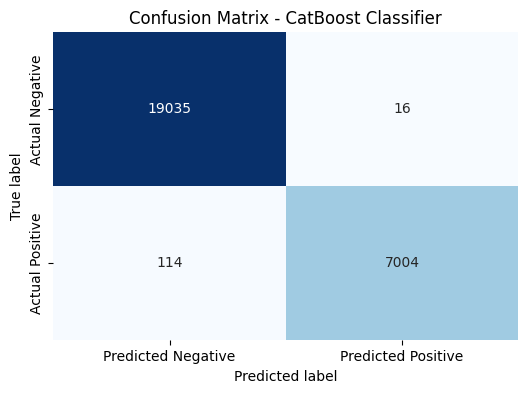

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from catboost import CatBoostClassifier

# Instantiate and train CatBoost Classifier
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

# Make predictions on the test set
y_pred_cat = cat.predict(X_test)

# Calculate accuracy, confusion matrix, and classification report
acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

y_prob_cat = cat.predict_proba(X_test)[:, 1]
auc_roc_cat = roc_auc_score(y_test, y_prob_cat)

print(f"AUC-ROC Score : {auc_roc_cat}")

# Print accuracy score, confusion matrix, and classification report
print(f"Accuracy Score of CatBoost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()


* 19035 bookings were correctly predicted as not canceled (True Negatives).
* 16 bookings were incorrectly predicted as canceled when they were actually not canceled (False Positives).
* 114 bookings were incorrectly predicted as not canceled when they were actually canceled (False Negatives).
* 7004 bookings were correctly predicted as canceled (True Positives).

Learning rate set to 0.492556
0:	learn: 0.5144004	total: 21.3ms	remaining: 2.11s
1:	learn: 0.4316185	total: 66.7ms	remaining: 3.27s
2:	learn: 0.3768931	total: 116ms	remaining: 3.74s
3:	learn: 0.3630254	total: 163ms	remaining: 3.91s
4:	learn: 0.3314635	total: 211ms	remaining: 4.01s
5:	learn: 0.3032849	total: 261ms	remaining: 4.09s
6:	learn: 0.2796286	total: 305ms	remaining: 4.05s
7:	learn: 0.2265041	total: 353ms	remaining: 4.06s
8:	learn: 0.2013925	total: 399ms	remaining: 4.04s
9:	learn: 0.1988336	total: 452ms	remaining: 4.07s
10:	learn: 0.1851275	total: 476ms	remaining: 3.85s
11:	learn: 0.1647035	total: 512ms	remaining: 3.75s
12:	learn: 0.1590710	total: 556ms	remaining: 3.72s
13:	learn: 0.1501413	total: 607ms	remaining: 3.73s
14:	learn: 0.1406126	total: 661ms	remaining: 3.75s
15:	learn: 0.1316679	total: 687ms	remaining: 3.61s
16:	learn: 0.1261752	total: 736ms	remaining: 3.59s
17:	learn: 0.1215405	total: 785ms	remaining: 3.58s
18:	learn: 0.1151053	total: 825ms	remaining: 3.52s
19:	learn

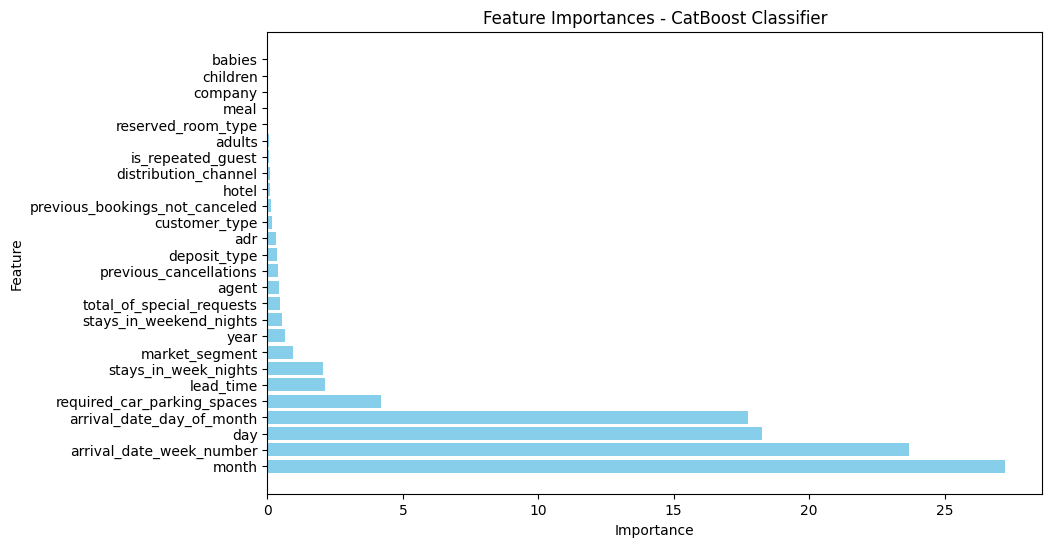

In [89]:
from catboost import CatBoostClassifier, Pool

# Train your CatBoost model
cat = CatBoostClassifier(iterations=100, random_state=42)
cat.fit(X_train, y_train)

# Get feature importances
feature_importances = cat.get_feature_importance(type='FeatureImportance')

# Map feature indices to feature names
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - CatBoost Classifier')
plt.show()
